### <center>  Deep Learning and Object Recognition </center>
### <center>  Lewison Choo | 2102290J </center>

## <font color= maroon>  Import Libraries

In [1]:
import keras
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D,\
                                    BatchNormalization, AveragePooling2D, LeakyReLU, UpSampling2D
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
from keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

## <font color= maroon>  Set to Utilise GPU

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.config.set_visible_devices(physical_devices[0], 'GPU')

## <font color= maroon>  Data Intake

### 1. Load the CIFAR-10 dataset

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


##  <font color= maroon> Data Exploration

### 1. Check the shape of both training and testing data

In [4]:
print ("X-Train Shape:", x_train.shape)
print ("Y-Train Shape:", y_train.shape)
print ("X-Test Shape:", x_test.shape)
print ("Y-Test Shape:", y_test.shape)

X-Train Shape: (50000, 32, 32, 3)
Y-Train Shape: (50000, 1)
X-Test Shape: (10000, 32, 32, 3)
Y-Test Shape: (10000, 1)


#### Take-aways:
- The shape of the data retrieved is correct and same as what is described on the website

### 2. Check the number of classes

In [5]:
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

Number of classes: 10


### 3. Check the maximum and minimum value of the pixel that forms the image

In [6]:
print("Maximum Pixel:", np.max(x_train))
print("Minimum Pixel:", np.min(x_train))

Maximum Pixel: 255
Minimum Pixel: 0


#### Take-aways: 
- The minimum pixel value is 0 and the maximum pixel value is 255

### 4. Visualise the data

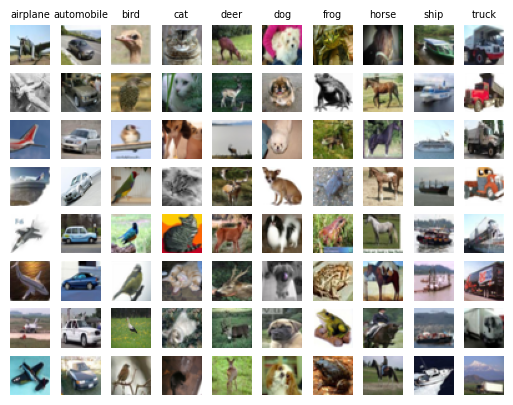

In [7]:
# Number of examples you want to see from each class
examples_per_class = 8 

# Define the list of classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(class_names)

# Loop over each class and randomly select examples to visualize
for cls, cls_name in enumerate(class_names):
    
    # Get the indices of all training examples belonging to the current class
    idxs = np.where(cls == y_train)

    # Randomly select `examples_per_class` examples from the current class
    idxs = np.random.choice(idxs[0], examples_per_class, replace=False)

    # Loop over the selected examples and display them in a grid
    for i, idx in enumerate(idxs):

        # Compute the subplot index for the current example
        subplot_idx = i * num_classes + cls + 1

        # Create a subplot for the current example
        plt.subplot(examples_per_class, num_classes, subplot_idx)

        # Display the current example and turn off the axis labels
        plt.imshow(x_train[idx].astype('uint8'), cmap='gray')
        plt.axis('off')

        # If this is the first example of the current class, add the class name as the title
        if i == 0:
          plt.title(cls_name, fontsize=7)

### 5. Check the Distribution in Training Dataset

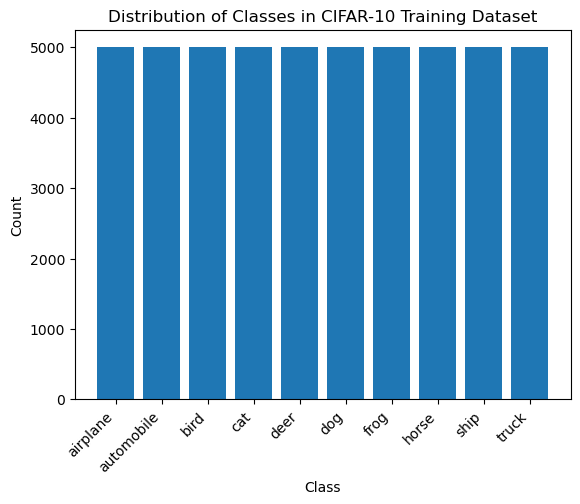

In [8]:
# Get the frequency of each class in the training dataset
counts = np.bincount(y_train[:, 0])

# Define the names of each class
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the bar chart
plt.bar(classes, counts)
plt.title('Distribution of Classes in CIFAR-10 Training Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

### 6. Check the Distribution in Testing Dataset

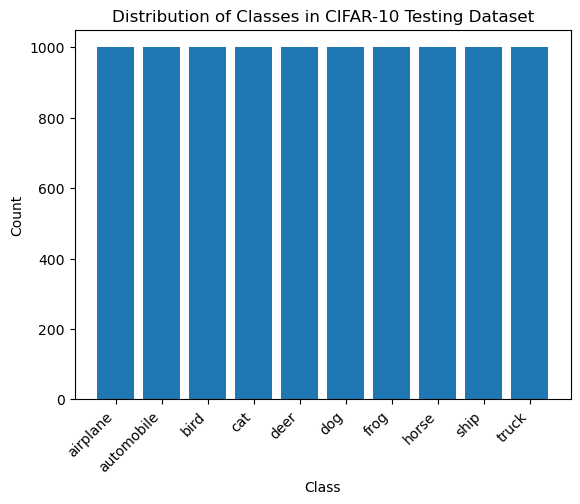

In [9]:
# Get the frequency of each class in the training dataset
counts = np.bincount(y_test[:, 0])

# Define the names of each class
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the bar chart
plt.bar(classes, counts)
plt.title('Distribution of Classes in CIFAR-10 Testing Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

### 7. Check the Distribution of Pixels of the first image from each class

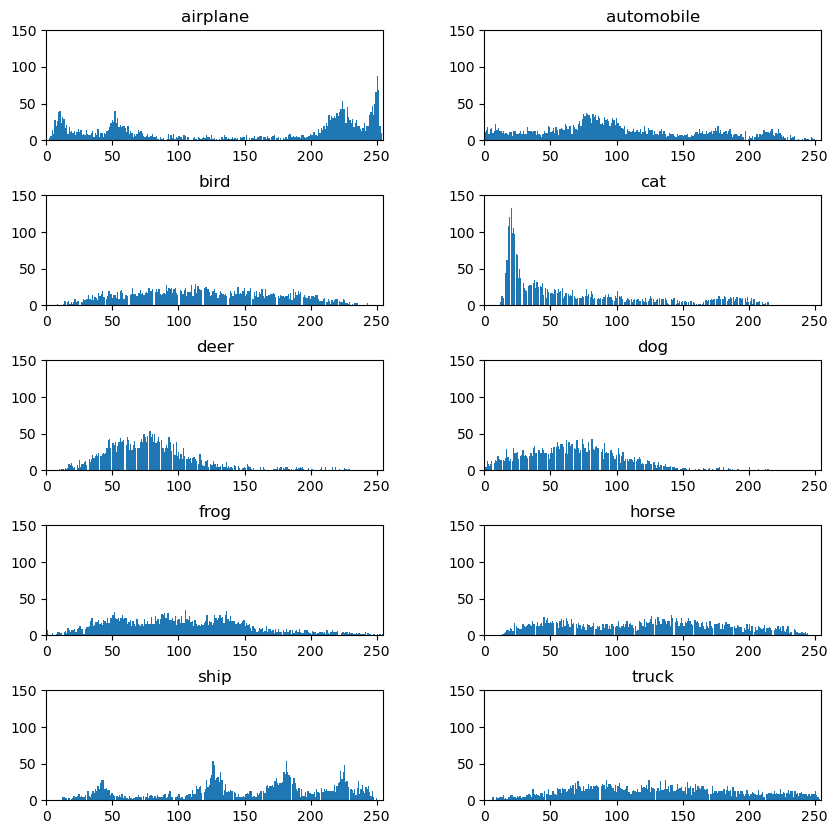

In [10]:
# Plot histograms of pixel values for different classes
plt.figure(figsize=(10, 10))  # Create a new figure with size 10x10
# Add vertical and horizontal spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Loop over the different classes in the dataset
for i in range(num_classes):  
    idx = np.where(y_train == i)[0][0]  # Find the index of the first image in the training set that belongs to the current class
    plt.subplot(5, 2, i+1)  # Set up a 5x2 grid of subplots and select the i+1-th subplot for the current class
    plt.hist(x_train[idx].ravel(), bins=255)  # Plot a histogram of the pixel values for the selected image, using 255 bins
    plt.xlim([0, 255])  # Set the x-axis limits to [0, 255]
    plt.ylim([0, 150])  # Set the y-axis limits to [0, 150]
    plt.title(class_names[i])  # Add a title to the subplot indicating the name of the current class
    
# Display the figure with all the subplots
plt.show()  

<hr style="border:10px solid black"> 
<h1 style="text-align:center;">DenseNet201 Pre-Trained Models</h1>
<hr style="border:10px solid black">

##  <font color= maroon> Description (DenseNet201 Baseline):
1. Pre-Process Input
2. Import DenseNet201 Pre-Trained Model | Trainable = False
2. 2x Dense Layers w 512/256 Neurons using Relu Activation Function
3. Adam Optimizer
4. Batch Size:32 | Epochs:20 

##  <font color= maroon> Data Preparation (Baseline) - DenseNet201 Pre-Trained

### 1. Load the CIFAR-10 Dataset

In [11]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Convert class vectors to binary class matrices

In [12]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

### 3. Check that it is converted correctly

In [13]:
print (y_test.shape)
print (y_test[:1,:])

(10000, 10)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


### 4. Preprocess the Data

In [14]:
x_train = keras.applications.densenet.preprocess_input(x_train)
x_test = keras.applications.densenet.preprocess_input(x_test)

### 5. Reformat the Size

In [15]:
IMG_SIZE = 224

def format_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

batch_size = 32

# Create TensorFlow Datasets for training and testing
training_set = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_set = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Apply resizing
training_set = training_set.shuffle(300).map(format_image).batch(batch_size).prefetch(1)
test_set = test_set.map(format_image).batch(batch_size).prefetch(1)

##  <font color= maroon> Data Building (Baseline) - DenseNet201 Pre-Trained

### 1. Define the Pre-Trained DenseNet201 Model

In [16]:
# Load the pre-trained DenseNet201 model
densenet201_model = tf.keras.applications.DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the DenseNet201 model
for layer in densenet201_model.layers:
    layer.trainable = False

74836368/74836368 [==============================] - 0s 0us/step


### 2. Print the Summary of the DenseNet201 Model

In [17]:
densenet201_model.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

### 3. Build the Overall Model Architecture

In [18]:
# Create a new model that includes the DenseNet201 model and additional layers
model = Sequential()
model.add(densenet201_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### 4. Print the Summary of the Overall Model

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 flatten (Flatten)           (None, 94080)             0         
                                                                 
 dense (Dense)               (None, 512)               48169472  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 66,625,354
Trainable params: 48,303,370
Non-trainable params: 18,321,984
_________________________________________________________________


##  <font color= maroon> Data Training (Baseline) - DenseNet201 Pre-Trained

### 1. Compile the Model

In [20]:
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

### 2. Train the Model

In [21]:
model_log = model.fit(training_set, epochs=20, validation_data=test_set)

Epoch 1/20
1563/1563 [==============================] - 207s 119ms/step - loss: 0.6633 - accuracy: 0.8610 - val_loss: 0.3251 - val_accuracy: 0.8880
Epoch 2/20
1563/1563 [==============================] - 180s 115ms/step - loss: 0.2389 - accuracy: 0.9213 - val_loss: 0.3503 - val_accuracy: 0.8940
Epoch 3/20
1563/1563 [==============================] - 180s 115ms/step - loss: 0.1828 - accuracy: 0.9404 - val_loss: 0.3827 - val_accuracy: 0.8973
Epoch 4/20
1563/1563 [==============================] - 180s 115ms/step - loss: 0.1316 - accuracy: 0.9570 - val_loss: 0.4024 - val_accuracy: 0.9030
Epoch 5/20
1563/1563 [==============================] - 181s 116ms/step - loss: 0.0951 - accuracy: 0.9680 - val_loss: 0.4288 - val_accuracy: 0.9032
Epoch 6/20
1563/1563 [==============================] - 181s 116ms/step - loss: 0.0812 - accuracy: 0.9734 - val_loss: 0.3994 - val_accuracy: 0.9102
Epoch 7/20
1563/1563 [==============================] - 182s 116ms/step - loss: 0.0654 - accuracy: 0.9781 - val_

##  <font color= maroon> Data Evaluation (Baseline) - DenseNet201 Pre-Trained

### 1. Visualise the Performance

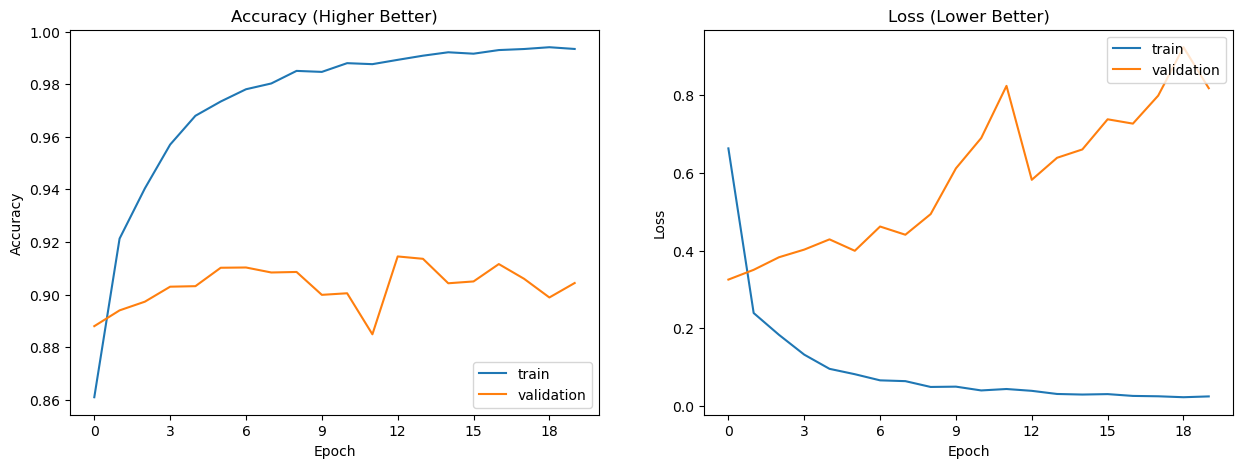

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

### 2. Evaluate the Model using Test Data

In [23]:
score = model.evaluate(test_set, verbose=0)

In [24]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8184477686882019
Test accuracy: 0.9043999910354614


### 3. Visualise the Wrongly Classified Data

In [25]:
predict_x = model.predict(test_set) 
output = np.argmax(predict_x,axis=1)
print(output)

313/313 [==============================] - 28s 81ms/step
[3 8 8 ... 5 1 7]


In [26]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
ind = np.where(np.equal(output, y_test.flatten())==0)

In [27]:
err_x = x_test[ind[0]]
err_y = output[ind[0]]

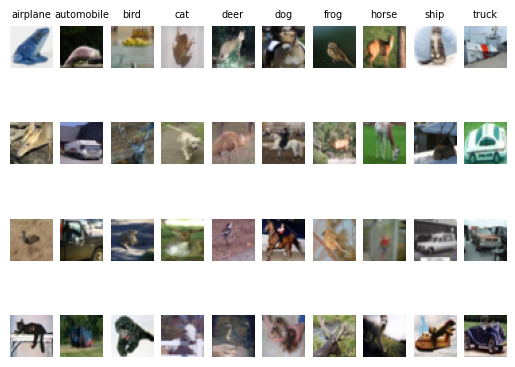

In [28]:
examples_per_class = 4

for cls, cls_name in enumerate(class_names):
  idxs = np.where(cls == err_y)
  idxs = np.random.choice(idxs[0], examples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt.subplot(examples_per_class, num_classes, i * num_classes + cls + 1)
    plt.imshow(err_x[idx].astype('uint8'), cmap = 'gray')
    plt.axis('off')
    if i == 0:
      plt.title(cls_name, fontsize=7)

<hr style="border:10px solid black"> 
<h1 style="text-align:center;">DenseNet201 Tuned 1</h1>
<hr style="border:10px solid black">

##  <font color= maroon> Description (DenseNet201 Tuned 1):
1. Pre-Process Input
2. Import DenseNet201 Pre-Trained Model | Trainable = False
2. 2x Dense Layers w 512/256 Neurons using Relu Activation Function
3. Adam Optimizer
4. Batch Size:128 | Epochs:20 
5. 2x Dropout (30%/20%)
    
### Difference from Baseline:
1. Batch Size: 32 -> 128
2. 2x Dropout (30%/20%)
    
### Note:
    - Built off from Tuned Baseline

##  <font color= maroon> Data Preparation (Tuned 1) - DenseNet201 Pre-Trained

### 1. Load the CIFAR-10 Dataset

In [31]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Convert class vectors to binary class matrices

In [32]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

### 3. Check that it is converted correctly

In [33]:
print (y_test.shape)
print (y_test[:1,:])

(10000, 10)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


### 4. Preprocess the Data

In [34]:
x_train = keras.applications.densenet.preprocess_input(x_train)
x_test = keras.applications.densenet.preprocess_input(x_test)

### 5. Reformat the Size

In [35]:
IMG_SIZE = 224

def format_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

batch_size = 128

# Create TensorFlow Datasets for training and testing
training_set = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_set = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Apply resizing
training_set = training_set.shuffle(300).map(format_image).batch(batch_size).prefetch(1)
test_set = test_set.map(format_image).batch(batch_size).prefetch(1)

##  <font color= maroon> Data Building (Tuned 1) - DenseNet201 Pre-Trained

### 1. Define the Pre-Trained DenseNet201 Model

In [36]:
# Load the pre-trained DenseNet201 model
densenet201_model = tf.keras.applications.DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the DenseNet201 model
for layer in densenet201_model.layers:
    layer.trainable = False

### 2. Print the Summary of the DenseNet201 Model

In [37]:
densenet201_model.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_2[0][0]']       
                                )                                                       

### 3. Build the Overall Model Architecture

In [38]:
# Create a new model that includes the DenseNet201 model and additional layers
model = Sequential()
model.add(densenet201_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### 4. Print the Summary of the Overall Model

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 flatten_1 (Flatten)         (None, 94080)             0         
                                                                 
 dense_3 (Dense)             (None, 512)               48169472  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)               

##  <font color= maroon> Data Training (Tuned 1) - DenseNet201 Pre-Trained

### 1. Compile the Model

In [40]:
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

### 2. Train the Model

In [41]:
model_log = model.fit(training_set, epochs=20, validation_data=test_set)

Epoch 1/20
391/391 [==============================] - 175s 405ms/step - loss: 0.9089 - accuracy: 0.8008 - val_loss: 0.3678 - val_accuracy: 0.8818
Epoch 2/20
391/391 [==============================] - 152s 388ms/step - loss: 0.4076 - accuracy: 0.8746 - val_loss: 0.3187 - val_accuracy: 0.8907
Epoch 3/20
391/391 [==============================] - 152s 388ms/step - loss: 0.2971 - accuracy: 0.9062 - val_loss: 0.2906 - val_accuracy: 0.9043
Epoch 4/20
391/391 [==============================] - 152s 388ms/step - loss: 0.2372 - accuracy: 0.9254 - val_loss: 0.3060 - val_accuracy: 0.9077
Epoch 5/20
391/391 [==============================] - 151s 387ms/step - loss: 0.2022 - accuracy: 0.9349 - val_loss: 0.2706 - val_accuracy: 0.9142
Epoch 6/20
391/391 [==============================] - 132s 338ms/step - loss: 0.1741 - accuracy: 0.9437 - val_loss: 0.2979 - val_accuracy: 0.9103
Epoch 7/20
391/391 [==============================] - 151s 387ms/step - loss: 0.1600 - accuracy: 0.9478 - val_loss: 0.2841 -

##  <font color= maroon> Data Evaluation (Tuned 1) - DenseNet201 Pre-Trained

### 1. Visualise the Performance

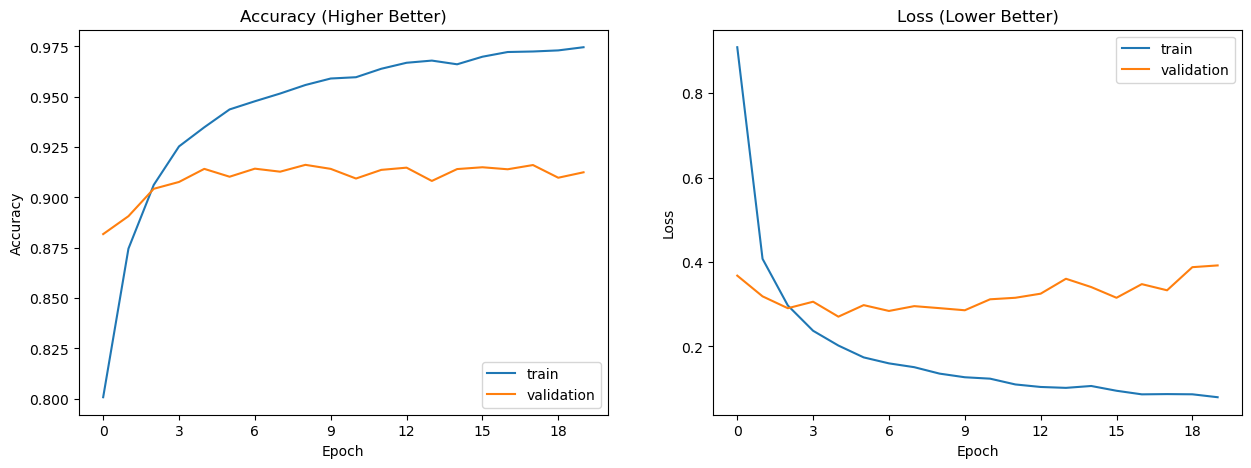

In [42]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

### 2. Evaluate the Model using Test Data

In [43]:
score = model.evaluate(test_set, verbose=0)

In [44]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.39198336005210876
Test accuracy: 0.9125000238418579


### 3. Visualise the Wrongly Classified Data

In [45]:
predict_x = model.predict(test_set) 
output = np.argmax(predict_x,axis=1)
print(output)

79/79 [==============================] - 24s 273ms/step
[3 8 8 ... 5 1 7]


In [46]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
ind = np.where(np.equal(output, y_test.flatten())==0)

In [47]:
err_x = x_test[ind[0]]
err_y = output[ind[0]]

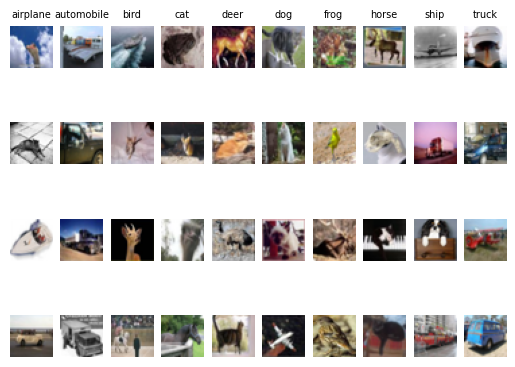

In [48]:
examples_per_class = 4

for cls, cls_name in enumerate(class_names):
  idxs = np.where(cls == err_y)
  idxs = np.random.choice(idxs[0], examples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt.subplot(examples_per_class, num_classes, i * num_classes + cls + 1)
    plt.imshow(err_x[idx].astype('uint8'), cmap = 'gray')
    plt.axis('off')
    if i == 0:
      plt.title(cls_name, fontsize=7)

<hr style="border:10px solid black"> 
<h1 style="text-align:center;">DenseNet201 Tuned 2</h1>
<hr style="border:10px solid black">

##  <font color= maroon> Description (DenseNet201 Tuned 2):
1. Pre-Process Input
2. Import DenseNet201 Pre-Trained Model | Trainable = False
2. 2x Dense Layers w 512/256 Neurons using Relu Activation Function
3. Adam Optimizer
4. Batch Size:128 | Epochs:20 
5. 2x Dropout (30%/20%)
6. Data Augmentation
    
### Difference from Baseline:
1. Batch Size: 32 -> 128
2. 2x Dropout (30%/20%)
3. Data Augmentation
    
### Note:
    - Built off from Tuned Tuned 1

##  <font color= maroon> Data Preparation (Tuned 2) - DenseNet201 Pre-Trained

### 1. Load the CIFAR-10 Dataset

In [55]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Convert class vectors to binary class matrices

In [56]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

### 3. Check that it is converted correctly

In [57]:
print (y_test.shape)
print (y_test[:1,:])

(10000, 10)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


### 4. Preprocess the Data

In [58]:
x_train = keras.applications.densenet.preprocess_input(x_train)
x_test = keras.applications.densenet.preprocess_input(x_test)

### 5. Reformat the Size

In [59]:
IMG_SIZE = 224

def format_image(image, label):
  # Resize the image
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  
  # Apply data augmentation
  image = tf.image.random_flip_left_right(image) # Random horizontal flip
  image = tf.image.rot90(image, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)) # Random rotation
  image = tf.image.random_crop(image, size=[int(IMG_SIZE*0.9), int(IMG_SIZE*0.9), 3]) # Random crop to enable shift augmentation
  image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE]) # Resize back after crop
  
  return image, label

def format_image2(image, label):
  # Resize the image
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))

  return image, label

batch_size = 128

# Create TensorFlow Datasets for training and testing
training_set = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_set = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Apply resizing, normalization, and data augmentation
training_set = training_set.shuffle(300).map(format_image).batch(batch_size).prefetch(1)
test_set = test_set.map(format_image2).batch(batch_size).prefetch(1)

##  <font color= maroon> Data Building (Tuned 2) - DenseNet201 Pre-Trained

### 1. Define the Pre-Trained DenseNet201 Model

In [60]:
# Load the pre-trained DenseNet201 model
densenet201_model = tf.keras.applications.DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the DenseNet201 model
for layer in densenet201_model.layers:
    layer.trainable = False

### 2. Print the Summary of the DenseNet201 Model

In [61]:
densenet201_model.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_4 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_3[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_4[0][0]']       
                                )                                                       

### 3. Build the Overall Model Architecture

In [62]:
# Create a new model that includes the DenseNet201 model and additional layers
model = Sequential()
model.add(densenet201_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### 4. Print the Summary of the Overall Model

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 flatten_2 (Flatten)         (None, 94080)             0         
                                                                 
 dense_6 (Dense)             (None, 512)               48169472  
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 10)               

##  <font color= maroon> Data Training (Tuned 2) - DenseNet201 Pre-Trained

### 1. Compile the Model

In [64]:
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

### 2. Train the Model

In [65]:
model_log = model.fit(training_set, epochs=20, validation_data=test_set)

Epoch 1/20
391/391 [==============================] - 166s 396ms/step - loss: 1.4956 - accuracy: 0.6022 - val_loss: 0.5292 - val_accuracy: 0.8328
Epoch 2/20
391/391 [==============================] - 151s 386ms/step - loss: 0.9006 - accuracy: 0.7029 - val_loss: 0.4604 - val_accuracy: 0.8589
Epoch 3/20
391/391 [==============================] - 151s 387ms/step - loss: 0.7752 - accuracy: 0.7422 - val_loss: 0.4385 - val_accuracy: 0.8625
Epoch 4/20
391/391 [==============================] - 151s 386ms/step - loss: 0.7156 - accuracy: 0.7602 - val_loss: 0.4308 - val_accuracy: 0.8650
Epoch 5/20
391/391 [==============================] - 151s 387ms/step - loss: 0.6916 - accuracy: 0.7692 - val_loss: 0.4258 - val_accuracy: 0.8672
Epoch 6/20
391/391 [==============================] - 151s 387ms/step - loss: 0.6680 - accuracy: 0.7758 - val_loss: 0.4190 - val_accuracy: 0.8652
Epoch 7/20
391/391 [==============================] - 151s 386ms/step - loss: 0.6493 - accuracy: 0.7820 - val_loss: 0.3948 -

##  <font color= maroon> Data Evaluation (Tuned 2) - DenseNet201 Pre-Trained

### 1. Visualise the Performance

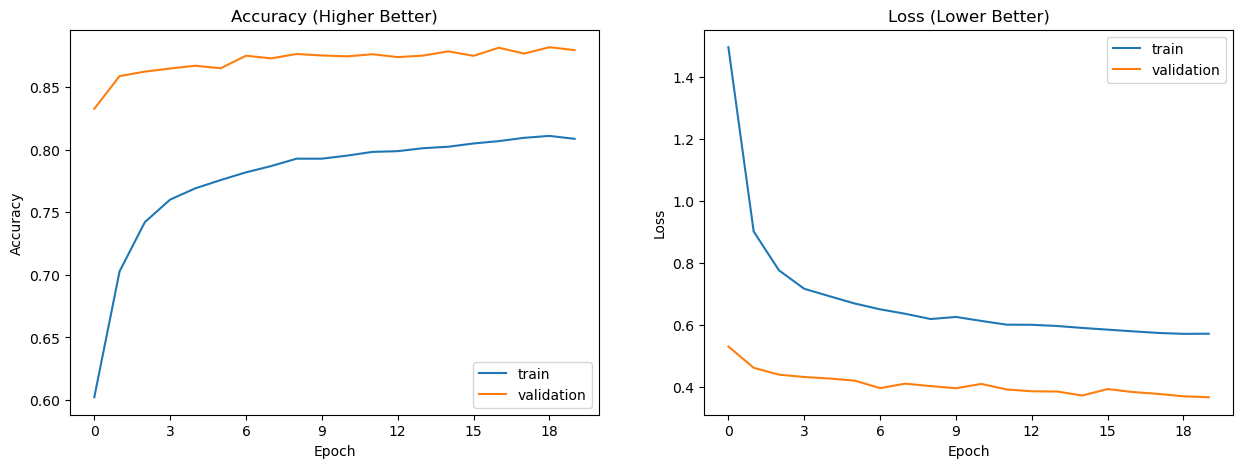

In [66]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

### 2. Evaluate the Model using Test Data

In [67]:
score = model.evaluate(test_set, verbose=0)

In [68]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.36547425389289856
Test accuracy: 0.8797000050544739


### 3. Visualise the Wrongly Classified Data

In [69]:
predict_x = model.predict(test_set) 
output = np.argmax(predict_x,axis=1)
print(output)

79/79 [==============================] - 25s 273ms/step
[3 8 8 ... 5 1 7]


In [70]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
ind = np.where(np.equal(output, y_test.flatten())==0)

In [71]:
err_x = x_test[ind[0]]
err_y = output[ind[0]]

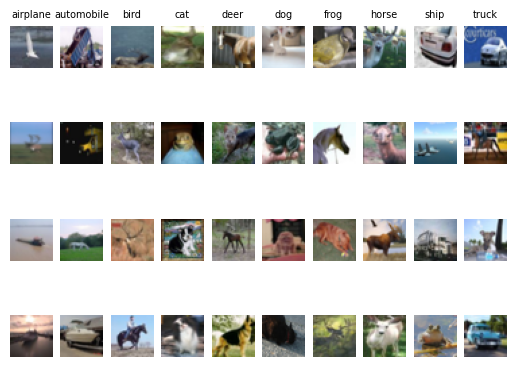

In [72]:
examples_per_class = 4

for cls, cls_name in enumerate(class_names):
  idxs = np.where(cls == err_y)
  idxs = np.random.choice(idxs[0], examples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt.subplot(examples_per_class, num_classes, i * num_classes + cls + 1)
    plt.imshow(err_x[idx].astype('uint8'), cmap = 'gray')
    plt.axis('off')
    if i == 0:
      plt.title(cls_name, fontsize=7)

<hr style="border:10px solid black"> 
<h1 style="text-align:center;">DenseNet201 Tuned 3</h1>
<hr style="border:10px solid black">

##  <font color= maroon> Description (DenseNet201 Tuned 3):
1. Pre-Process Input
2. Import DenseNet201 Pre-Trained Model | Trainable = True
2. 2x Dense Layers w 512/256 Neurons using Relu Activation Function
3. Adam Optimizer
4. Batch Size:128 | Epochs:20 
5. 2x Dropout (30%/20%)
6. Data Augmentation
    
### Difference from Baseline:
1. Batch Size: 32 -> 128
2. 2x Dropout (30%/20%)
3. Data Augmentation
4. Trainable = True
    
### Note:
    - Built off from Tuned Tuned 2

##  <font color= maroon> Data Preparation (Tuned 3) - DenseNet201 Pre-Trained

### 1. Load the CIFAR-10 Dataset

In [1]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

NameError: name 'cifar10' is not defined

### 2. Convert class vectors to binary class matrices

In [56]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

### 3. Check that it is converted correctly

In [57]:
print (y_test.shape)
print (y_test[:1,:])

(10000, 10)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


### 4. Preprocess the Data

In [58]:
x_train = keras.applications.densenet.preprocess_input(x_train)
x_test = keras.applications.densenet.preprocess_input(x_test)

### 5. Reformat the Size

In [59]:
IMG_SIZE = 224

def format_image(image, label):
  # Resize the image
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  
  # Apply data augmentation
  image = tf.image.random_flip_left_right(image) # Random horizontal flip
  image = tf.image.rot90(image, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)) # Random rotation
  image = tf.image.random_crop(image, size=[int(IMG_SIZE*0.9), int(IMG_SIZE*0.9), 3]) # Random crop to enable shift augmentation
  image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE]) # Resize back after crop
  
  return image, label

def format_image2(image, label):
  # Resize the image
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))

  return image, label

batch_size = 128

# Create TensorFlow Datasets for training and testing
training_set = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_set = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Apply resizing, normalization, and data augmentation
training_set = training_set.shuffle(300).map(format_image).batch(batch_size).prefetch(1)
test_set = test_set.map(format_image2).batch(batch_size).prefetch(1)

##  <font color= maroon> Data Building (Tuned 3) - DenseNet201 Pre-Trained

### 1. Define the Pre-Trained DenseNet201 Model

In [60]:
# Load the pre-trained DenseNet201 model
densenet201_model = tf.keras.applications.DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the DenseNet201 model
for layer in densenet201_model.layers:
    layer.trainable = False

### 2. Print the Summary of the DenseNet201 Model

In [61]:
densenet201_model.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_4 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_3[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_4[0][0]']       
                                )                                                       

### 3. Build the Overall Model Architecture

In [62]:
# Create a new model that includes the DenseNet201 model and additional layers
model = Sequential()
model.add(densenet201_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### 4. Print the Summary of the Overall Model

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 flatten_2 (Flatten)         (None, 94080)             0         
                                                                 
 dense_6 (Dense)             (None, 512)               48169472  
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 10)               

##  <font color= maroon> Data Training (Tuned 3) - DenseNet201 Pre-Trained

### 1. Compile the Model

In [64]:
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

### 2. Train the Model

In [65]:
model_log = model.fit(training_set, epochs=20, validation_data=test_set)

Epoch 1/20
391/391 [==============================] - 166s 396ms/step - loss: 1.4956 - accuracy: 0.6022 - val_loss: 0.5292 - val_accuracy: 0.8328
Epoch 2/20
391/391 [==============================] - 151s 386ms/step - loss: 0.9006 - accuracy: 0.7029 - val_loss: 0.4604 - val_accuracy: 0.8589
Epoch 3/20
391/391 [==============================] - 151s 387ms/step - loss: 0.7752 - accuracy: 0.7422 - val_loss: 0.4385 - val_accuracy: 0.8625
Epoch 4/20
391/391 [==============================] - 151s 386ms/step - loss: 0.7156 - accuracy: 0.7602 - val_loss: 0.4308 - val_accuracy: 0.8650
Epoch 5/20
391/391 [==============================] - 151s 387ms/step - loss: 0.6916 - accuracy: 0.7692 - val_loss: 0.4258 - val_accuracy: 0.8672
Epoch 6/20
391/391 [==============================] - 151s 387ms/step - loss: 0.6680 - accuracy: 0.7758 - val_loss: 0.4190 - val_accuracy: 0.8652
Epoch 7/20
391/391 [==============================] - 151s 386ms/step - loss: 0.6493 - accuracy: 0.7820 - val_loss: 0.3948 -

##  <font color= maroon> Data Evaluation (Tuned 3) - DenseNet201 Pre-Trained

### 1. Visualise the Performance

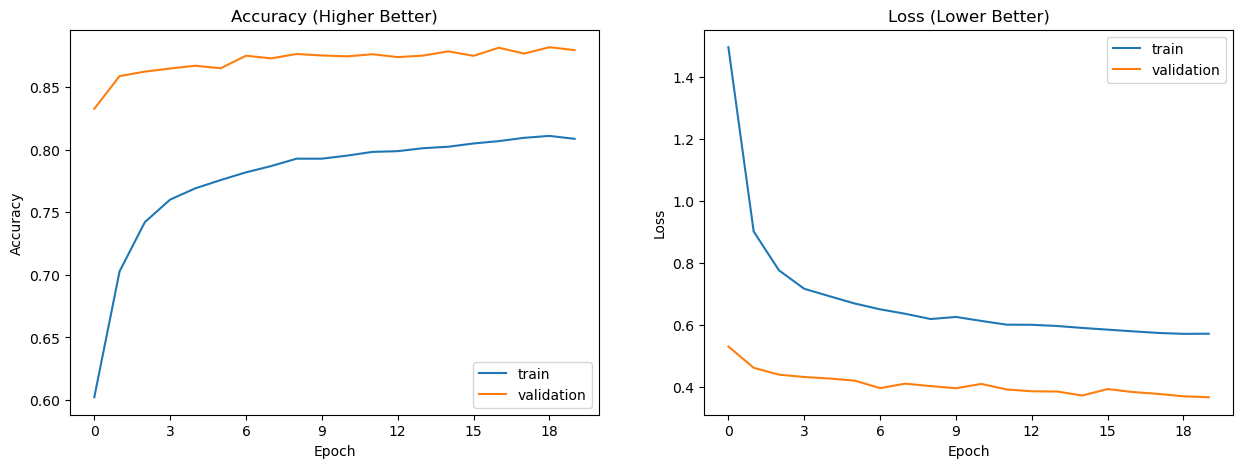

In [66]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

### 2. Evaluate the Model using Test Data

In [67]:
score = model.evaluate(test_set, verbose=0)

In [68]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.36547425389289856
Test accuracy: 0.8797000050544739


### 3. Visualise the Wrongly Classified Data

In [69]:
predict_x = model.predict(test_set) 
output = np.argmax(predict_x,axis=1)
print(output)

79/79 [==============================] - 25s 273ms/step
[3 8 8 ... 5 1 7]


In [70]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
ind = np.where(np.equal(output, y_test.flatten())==0)

In [71]:
err_x = x_test[ind[0]]
err_y = output[ind[0]]

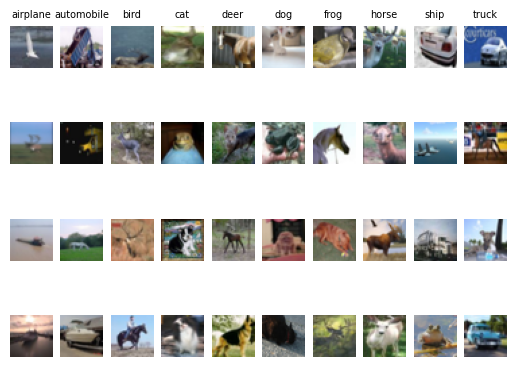

In [72]:
examples_per_class = 4

for cls, cls_name in enumerate(class_names):
  idxs = np.where(cls == err_y)
  idxs = np.random.choice(idxs[0], examples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt.subplot(examples_per_class, num_classes, i * num_classes + cls + 1)
    plt.imshow(err_x[idx].astype('uint8'), cmap = 'gray')
    plt.axis('off')
    if i == 0:
      plt.title(cls_name, fontsize=7)